In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [6]:
import pandas as pd

#Load dataset
data = pd.read_csv('titanic.csv')  

In [ ]:
#Data Summary

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [12]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
#Visualize Key Features

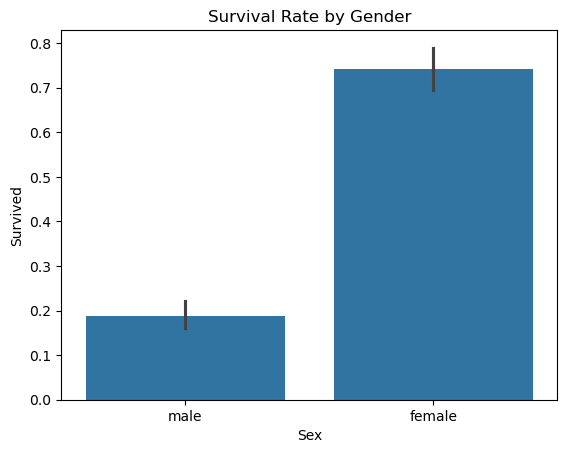

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Survival Rate by Gender")
plt.show()

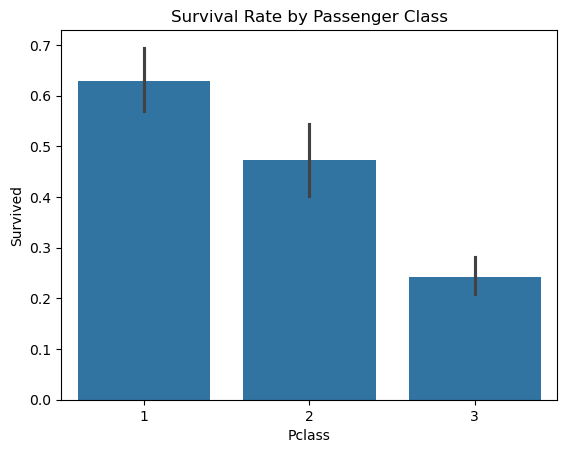

In [16]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title("Survival Rate by Passenger Class")
plt.show()

In [22]:
#Explore missing values 
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [24]:
#Count unique values
print(data.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [26]:
#Distribution of age
print(data['Age'].describe())
print(data['Age'].value_counts())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


In [28]:
#Count of survivors and non-survivors
print(data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [30]:
#Survival rate grouped by gender
print(data.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [32]:
#Survival rate grouped by passenger class
print(data.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [42]:
#Correlation between numeric features
#Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

#Now calculate the correlation
print(numeric_data.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [44]:
#Filter correlations above 0.5
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()  # Select only numeric columns
print(correlation_matrix[correlation_matrix > 0.5])  # Print correlations above 0.5

             PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare
PassengerId          1.0       NaN     NaN  NaN    NaN    NaN   NaN
Survived             NaN       1.0     NaN  NaN    NaN    NaN   NaN
Pclass               NaN       NaN     1.0  NaN    NaN    NaN   NaN
Age                  NaN       NaN     NaN  1.0    NaN    NaN   NaN
SibSp                NaN       NaN     NaN  NaN    1.0    NaN   NaN
Parch                NaN       NaN     NaN  NaN    NaN    1.0   NaN
Fare                 NaN       NaN     NaN  NaN    NaN    NaN   1.0


In [46]:
#Unique values in 'Embarked'
print(data['Embarked'].unique())

['S' 'C' 'Q' nan]


In [48]:
#Frequency of each category in 'Embarked'
print(data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


C:\Users\Vyshnavi\AppData\Local\Temp\ipykernel_28936\1702862271.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='viridis')


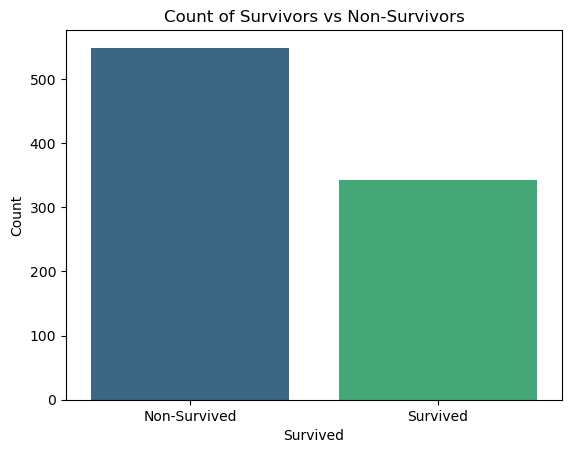

In [50]:
sns.countplot(x='Survived', data=data, palette='viridis')
plt.title("Count of Survivors vs Non-Survivors")
plt.xticks([0, 1], ['Non-Survived', 'Survived'])
plt.ylabel("Count")
plt.show()

C:\Users\Vyshnavi\AppData\Local\Temp\ipykernel_28936\3047054684.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, palette='pastel')


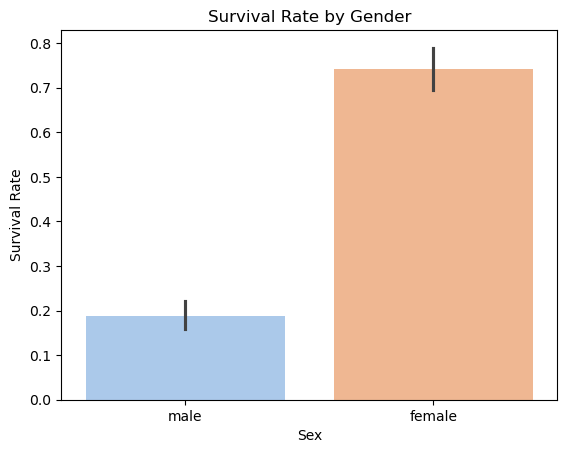

In [52]:
sns.barplot(x='Sex', y='Survived', data=data, palette='pastel')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

C:\Users\Vyshnavi\AppData\Local\Temp\ipykernel_28936\2052118404.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, palette='coolwarm')


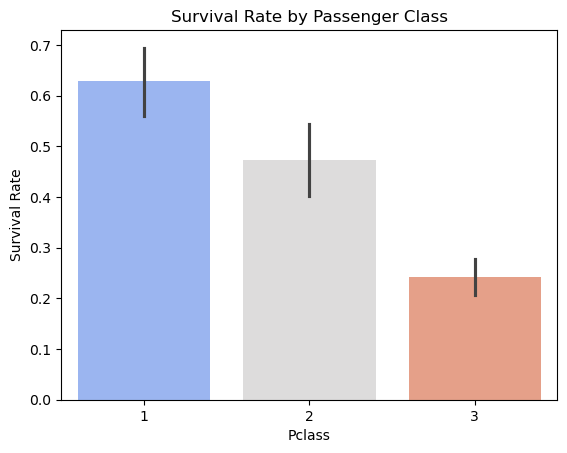

In [54]:
sns.barplot(x='Pclass', y='Survived', data=data, palette='coolwarm')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

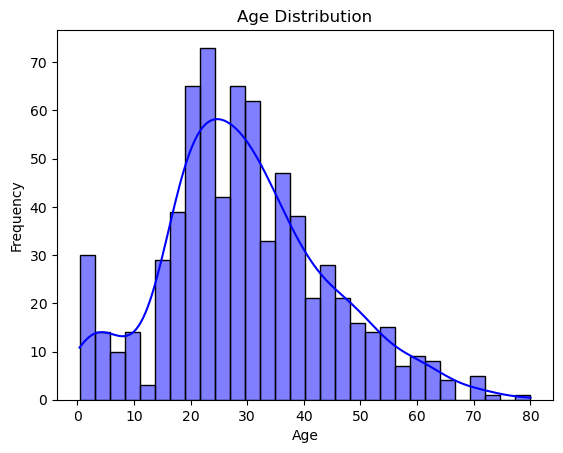

In [56]:
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

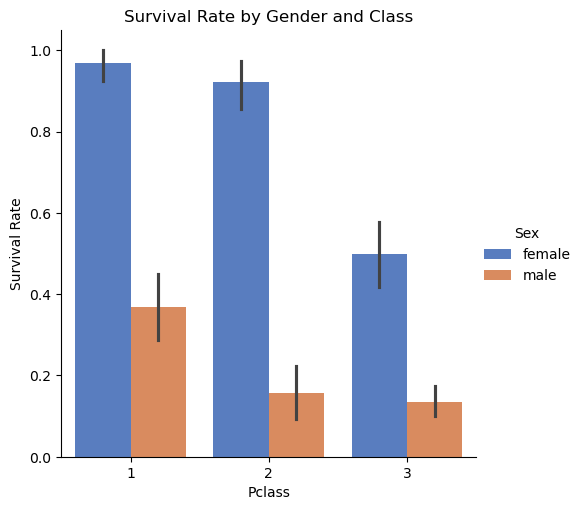

In [58]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=data, palette='muted')
plt.title("Survival Rate by Gender and Class")
plt.ylabel("Survival Rate")
plt.show()

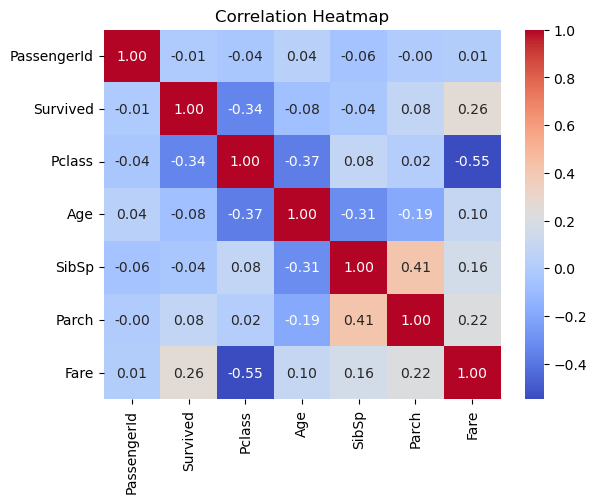

In [63]:
# Select only numeric columns from the DataFrame for correlation calculation
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Create the heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Vyshnavi\AppData\Local\Temp\ipykernel_28936\198754236.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=data, palette='Set2')


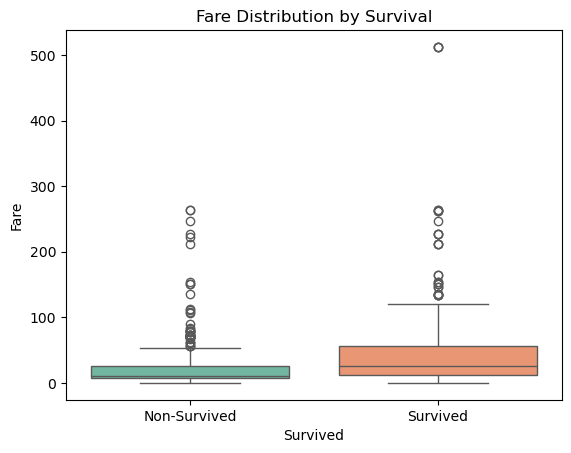

In [65]:
sns.boxplot(x='Survived', y='Fare', data=data, palette='Set2')
plt.title("Fare Distribution by Survival")
plt.xticks([0, 1], ['Non-Survived', 'Survived'])
plt.ylabel("Fare")
plt.show()


C:\Users\Vyshnavi\AppData\Local\Temp\ipykernel_28936\2949104271.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=data, palette='cubehelix')


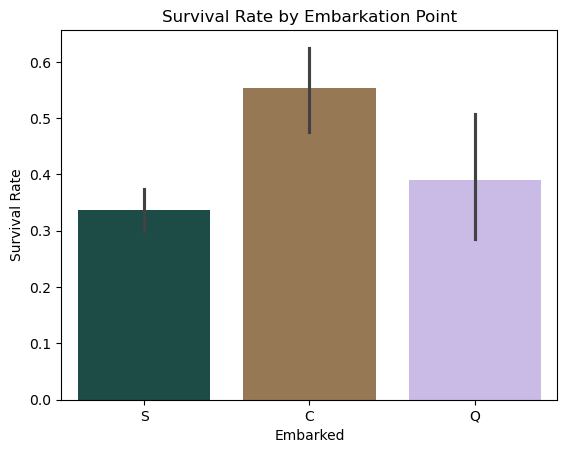

In [67]:
sns.barplot(x='Embarked', y='Survived', data=data, palette='cubehelix')
plt.title("Survival Rate by Embarkation Point")
plt.ylabel("Survival Rate")
plt.show()

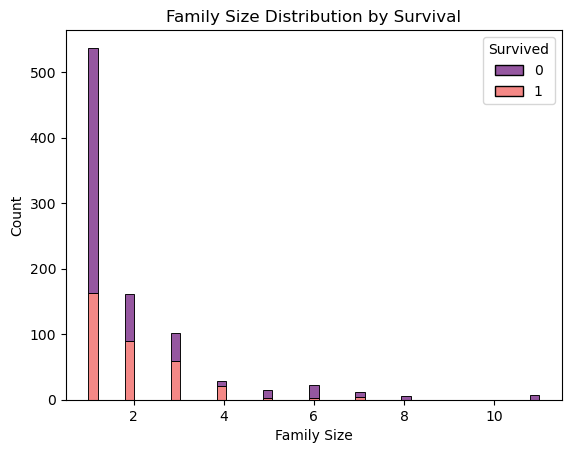

In [69]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1  # Create FamilySize feature
sns.histplot(data=data, x='FamilySize', hue='Survived', multiple='stack', palette='magma', kde=False)
plt.title("Family Size Distribution by Survival")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()

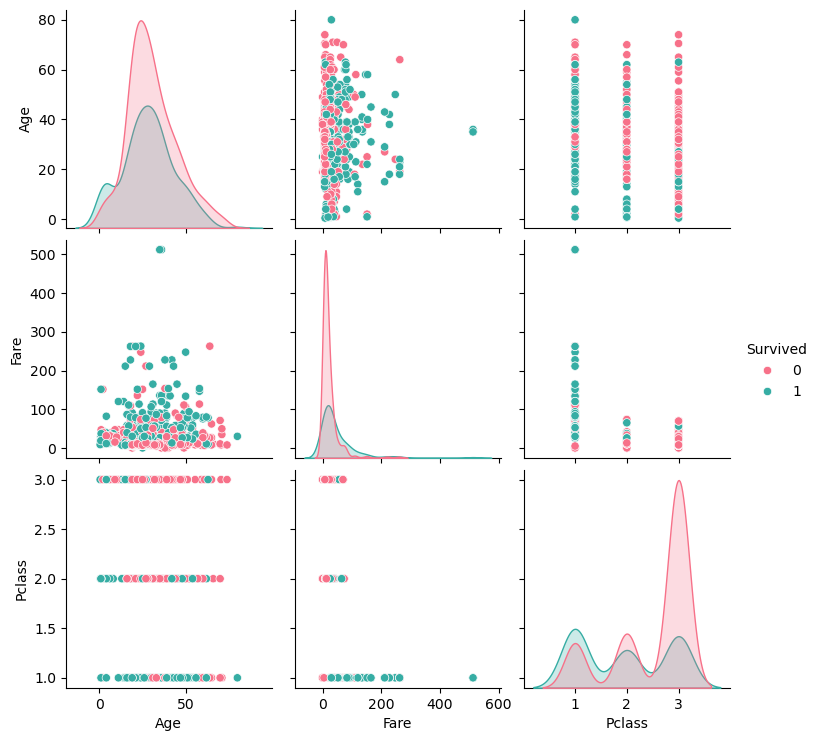

In [71]:
sns.pairplot(data[['Age', 'Fare', 'Survived', 'Pclass']], hue='Survived', palette='husl')
plt.show()